In [11]:
import pandas as pd
import numpy as np
#import regex
import re
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn import *


/Users/apple/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/apple/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/apple/anaconda/lib/python3.5/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [ ]:
# def get_classifiers():
#     return {
#         'Nearest Neighbors': KNeighborsClassifier(),
#         'Linear SVM': LinearSVC(),
#         'RBF SVM': SVC(),
#         'RBF SVM Weighted': SVC(class_weight='auto'),
#         'LDA': LDA(),
#         'Random Forest 10': RandomForestClassifier(10),
#         'Random Forest 100': RandomForestClassifier(100),
#         'Dummy Classifier Random': DummyClassifier(strategy='uniform'),
#         'Dummy Classifier Weighted': DummyClassifier(strategy='stratified')
#     }

In [45]:
# trainTweets = pd.read_csv("/Users/apple/Desktop/[New Folders]/Downloads/[Unimelb]/[2017 Sem1]/Knowledge Technology/Assignment/Project 2/2017S1-KTproj2-data/train-tweets.csv")
# trainTweets = csv.reader(open('/Users/apple/Desktop/[New Folders]/Downloads/[Unimelb]/[2017 Sem1]/Knowledge Technology/Assignment/Project 2/2017S1-KTproj2-data/train-tweets.txt', 'rb'), delimiter=' ', quotechar='|')

# tweet = trainTweets[1]
# tweet

In [21]:
# #start process_tweet
# def processTweet(tweet):
#     # process the tweets

#     #Convert to lower case
#     tweet = tweet.lower()
#     #Convert www.* or https?://* to URL
#     tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
#     #Convert @username to AT_USER
#     tweet = re.sub('@[^\s]+','AT_USER',tweet)
#     #Remove additional white spaces
#     tweet = re.sub('[\s]+', ' ', tweet)
#     #Replace #word with word
#     tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
#     #trim
#     tweet = tweet.strip('\'"')
#     return tweet
# #end

# #Read the tweets one by one and process it
# fp = open('data/sampleTweets.txt', 'r')
# line = fp.readline()

# while line:
#     processedTweet = processTweet(line)
#     print processedTweet
#     line = fp.readline()
# #end loop
# fp.close()

In [ ]:
# #initialize stopWords
# stopWords = []

# #start replaceTwoOrMore
# def replaceTwoOrMore(s):
#     #look for 2 or more repetitions of character and replace with the character itself
#     pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
#     return pattern.sub(r"\1\1", s)
# #end

# #start getStopWordList
# def getStopWordList(stopWordListFileName):
#     #read the stopwords file and build a list
#     stopWords = []
#     stopWords.append('AT_USER')
#     stopWords.append('URL')

#     fp = open(stopWordListFileName, 'r')
#     line = fp.readline()
#     while line:
#         word = line.strip()
#         stopWords.append(word)
#         line = fp.readline()
#     fp.close()
#     return stopWords
# #end

# #start getfeatureVector
# def getFeatureVector(tweet):
#     featureVector = []
#     #split tweet into words
#     words = tweet.split()
#     for w in words:
#         #replace two or more with two occurrences
#         w = replaceTwoOrMore(w)
#         #strip punctuation
#         w = w.strip('\'"?,.')
#         #check if the word stats with an alphabet
#         val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
#         #ignore if it is a stop word
#         if(w in stopWords or val is None):
#             continue
#         else:
#             featureVector.append(w.lower())
#     return featureVector
# #end

# #Read the tweets one by one and process it
# fp = open('data/sampleTweets.txt', 'r')
# line = fp.readline()

# st = open('data/feature_list/stopwords.txt', 'r')
# stopWords = getStopWordList('data/feature_list/stopwords.txt')

# while line:
#     processedTweet = processTweet(line)
#     featureVector = getFeatureVector(processedTweet)
#     print featureVector
#     line = fp.readline()
# #end loop
# fp.close()

In [94]:
# #Read the tweets one by one and process it
# trainTweets = csv.reader(open('/Users/apple/Desktop/[New Folders]/Downloads/[Unimelb]/[2017 Sem1]/Knowledge Technology/Assignment/Project 2/2017S1-KTproj2-data/train-01.csv', 'rb'), delimiter=',', quotechar='|')
# devTweets 
# tweets = []
# for row in trainTweets:
#     sentiment = row[47]
#     tweet = row[1]
#     processedTweet = processTweet(tweet)
#     featureVector = getFeatureVector(processedTweet, stopWords)
#     tweets.append((featureVector, sentiment));
# #end loop


## Start from here

In [119]:
trainData = pd.read_csv("/Users/apple/Desktop/[New Folders]/Downloads/[Unimelb]/[2017 Sem1]/Knowledge Technology/Assignment/Project 2/2017S1-KTproj2-data/train-01.csv")
devData = pd.read_csv("/Users/apple/Desktop/[New Folders]/Downloads/[Unimelb]/[2017 Sem1]/Knowledge Technology/Assignment/Project 2/2017S1-KTproj2-data/dev-01.csv")
testData = pd.read_csv("/Users/apple/Desktop/[New Folders]/Downloads/[Unimelb]/[2017 Sem1]/Knowledge Technology/Assignment/Project 2/2017S1-KTproj2-data/test-01.csv")

import numpy
numpy.set_printoptions(threshold=50)

# trainTweet = pd.read_csv("/Users/apple/Desktop/[New Folders]/Downloads/[Unimelb]/[2017 Sem1]/Knowledge Technology/Assignment/Project 2/2017S1-KTproj2-data/train-tweets.txt", 
#                              sep='\t', lineterminator='\r')

trainTweet = pd.read_csv("/Users/apple/Desktop/[New Folders]/Downloads/[Unimelb]/[2017 Sem1]/Knowledge Technology/Assignment/Project 2/2017S1-KTproj2-data/train-tweets-utf8.txt")

trainTweetString = trainTweet.to_string()
# trainTweetString

# import csv
# with open('/Users/apple/Desktop/[New Folders]/Downloads/[Unimelb]/[2017 Sem1]/Knowledge Technology/Assignment/Project 2/2017S1-KTproj2-data/train-tweets.txt', 'r') as f:
#     reader = csv.reader(f, dialect='excel', delimiter='\t')
#     for r in reader:     
#         del r[0]
# #     for row in reader:
# #         print (row)
# print(reader)


In [120]:
trainSentiment = trainData['sentiment']
trainData.drop('id', axis = 1, inplace =True)
trainData.drop('sentiment', axis = 1, inplace =True)
devSentiment = devData['sentiment']
devData.drop('id', axis = 1, inplace =True)
devData.drop('sentiment', axis = 1, inplace =True)
testSentiment = testData['sentiment']
testData.drop('id', axis = 1, inplace =True)
testData.drop('sentiment', axis = 1, inplace =True)

trainDataList = trainData.values.tolist()
trainSentimentList = trainSentiment.values.tolist()
trainDataArray = np.array(trainData)
trainSentimentArray = np.array(trainSentiment)

In [121]:
X = trainData
Y = trainSentiment
Z = devData
W = devSentiment
T = testData

## Preprocessing

In [35]:
trainCount = [0,0,0]
for i in W:
    if i=='positive':
        trainCount[0]+=1
    elif i=='neutral':
        trainCount[1]+=1
    else:
        trainCount[2]+=1
print(trainCount[0],trainCount[1],trainCount[2],sum(trainCount))

1488 2400 1038 4926


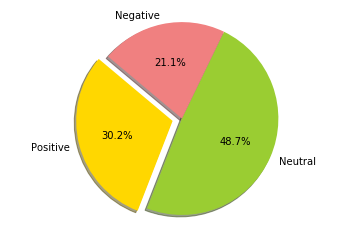

In [38]:
# corpus stat
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = [trainCount[0],trainCount[1],trainCount[2]]
colors = ['gold', 'yellowgreen', 'lightcoral'] #, 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)
ct = vectorizer.fit_transform(X)
analyze = vectorizer.build_analyzer()
ct

<46x44 sparse matrix of type '<class 'numpy.int64'>'
	with 44 stored elements in Compressed Sparse Row format>

In [122]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(min_df=1)
# ct = vectorizer.fit_transform(trainTweetString)


In [104]:
vocab = vectorizer.get_feature_names() 
vocab

['amazing',
 'antman',
 'are',
 'at',
 'awesome',
 'best',
 'birthday',
 'cant',
 'cream',
 'day',
 'death',
 'drone',
 'excited',
 'fake',
 'fuck',
 'fucking',
 'good',
 'great',
 'gucci',
 'happy',
 'hate',
 'ice',
 'im',
 'is',
 'leftists',
 'liberals',
 'love',
 'my',
 'national',
 'nazi',
 'night',
 'not',
 'obama',
 'people',
 'racist',
 'see',
 'shit',
 'so',
 'stupid',
 'supremacists',
 'th',
 'they',
 'tomorrow',
 'trump']

In [105]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
vocabnostop = set(vocab)-stop
vocabnostop

{'amazing',
 'antman',
 'awesome',
 'best',
 'birthday',
 'cant',
 'cream',
 'day',
 'death',
 'drone',
 'excited',
 'fake',
 'fuck',
 'fucking',
 'good',
 'great',
 'gucci',
 'happy',
 'hate',
 'ice',
 'im',
 'leftists',
 'liberals',
 'love',
 'national',
 'nazi',
 'night',
 'obama',
 'people',
 'racist',
 'see',
 'shit',
 'stupid',
 'supremacists',
 'th',
 'tomorrow',
 'trump'}

In [126]:
from textblob import TextBlob
trainTweetCollection = ''.join(map(str, trainTweetString))
trainTweetBlob = TextBlob(trainTweetCollection)
# trainTweetBlob

In [125]:
# trainTweetBlob.tags

In [124]:
# trainTweetBlob.words

In [123]:
# trainTweetBlob.noun_phrases # doesn't work

In [ ]:
trainTweetBlob.ngrams(n=3)

In [ ]:
import numpy
numpy.set_printoptions(threshold=30)


In [127]:
# from textblob import textblob.packages.nltk.corpus
# corpus = corpus(trainTweetBlob)
# stopwords = corpus.get_stopwords(std=2.5)
# stopwords



In [128]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
# sentence = "this is a foo bar sentence"
trainTweetBlobNoStop = set(trainTweetBlob.words) - stop
# print [i for i in sentence.lower().split() if i not in stop]
# trainTweetBlobNoStop

In [129]:
# import nltk
# from nltk import word_tokenize
# from nltk.util import ngrams
# from collections import Counter

# text = trainTweetBlobNoStop
# token = nltk.word_tokenize(text)
# bigrams = ngrams(token,2)
# trigrams = ngrams(token,3)
# fourgrams = ngrams(token,4)
# fivegrams = ngrams(token,5)



## NaiveBayes

In [134]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
d_pred = clf.fit(trainData, trainSentiment).predict(devData)
t_pred = clf.fit(trainData, trainSentiment).predict(testData)
text_file = open("testNB.txt", "w")
for item in t_pred:
  text_file.write("%s\n" % item)
text_file.close()

tot=devData.shape[0]
pre=(devSentiment == d_pred).sum()
per=pre/tot
print("Number of correct points out of a total %d points : %d percentage : %f" 
      % (devData.shape[0],(devSentiment == d_pred).sum(),per))

Number of correct points out of a total 4926 points : 2731 percentage : 0.554405


In [115]:
y_true = devSentiment
y_pred = d_pred
target_names = ['positive', 'neutral', 'negative']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

   positive       0.53      0.30      0.38      1038
    neutral       0.58      0.64      0.61      2400
   negative       0.52      0.59      0.55      1488

avg / total       0.55      0.55      0.55      4926



## MultinomialNB

In [147]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
d_pred=clf.fit(X, Y).predict(Z)
t_pred = clf.fit(X, Y).predict(Z)
text_file = open("testMNB.txt", "w")
for item in t_pred:
  text_file.write("%s\n" % item)
text_file.close()

tot=devData.shape[0]
pre=(devSentiment == d_pred).sum()
per=pre/tot
print("Number of correct points out of a total %d points : %d percentage : %f" 
      % (devData.shape[0],(devSentiment == d_pred).sum(),per))


Number of correct points out of a total 4926 points : 2866 percentage : 0.581811


In [117]:
y_true = devSentiment
y_pred = d_pred
target_names = ['positive', 'neutral', 'negative']
print(classification_report(y_true, y_pred, target_names=target_names))


             precision    recall  f1-score   support

   positive       0.61      0.22      0.32      1038
    neutral       0.55      0.89      0.68      2400
   negative       0.71      0.34      0.46      1488

avg / total       0.61      0.58      0.54      4926



In [89]:
# List test
a = [[1,2,3],['a','b','c'],['x','xx','xxx'],['1a','1b','1c']]
print(a[0:1])
print(a[0])

[[1, 2, 3]]
[1, 2, 3]


In [136]:
# import numpy as np
# from sklearn.model_selection import validation_curve
# from sklearn.datasets import load_iris
# from sklearn.linear_model import Ridge

# np.random.seed(0)
# # iris = load_iris()
# # X, y = iris.data, iris.target
# indices = np.arange(Y.shape[0])
# np.random.shuffle(indices)
# X, Y = X[indices], Y[indices]

# train_scores, valid_scores = validation_curve(Ridge(), X, Y, "alpha",
#                                               np.logspace(-7, 3, 3))
# train_scores           

# valid_scores           


## DecisionTree

In [ ]:
X = trainData
Y = trainSentiment
Z = devData

In [137]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
d_pred=clf.predict(Z)
t_pred = clf.fit(X, Y).predict(Z)
text_file = open("testDT.txt", "w")
for item in t_pred:
  text_file.write("%s\n" % item)
text_file.close()

tot=devData.shape[0]
pre=(devSentiment != d_pred).sum()
per=pre/tot
print("Number of mislabeled points out of a total %d points : %d percentage : %f" 
      % (devData.shape[0],(devSentiment != d_pred).sum(),per))

Number of mislabeled points out of a total 4926 points : 2186 percentage : 0.443768


In [100]:
from sklearn.metrics import classification_report
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
# target_names = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_true, y_pred, target_names=target_names))
y_true = devSentiment
y_pred = d_pred
target_names = ['positive', 'neutral', 'negative']
print(classification_report(y_true, y_pred, target_names=target_names))


             precision    recall  f1-score   support

   positive       0.46      0.24      0.32      1038
    neutral       0.55      0.84      0.66      2400
   negative       0.66      0.32      0.43      1488

avg / total       0.56      0.56      0.52      4926



## DecisionTreeDiagram

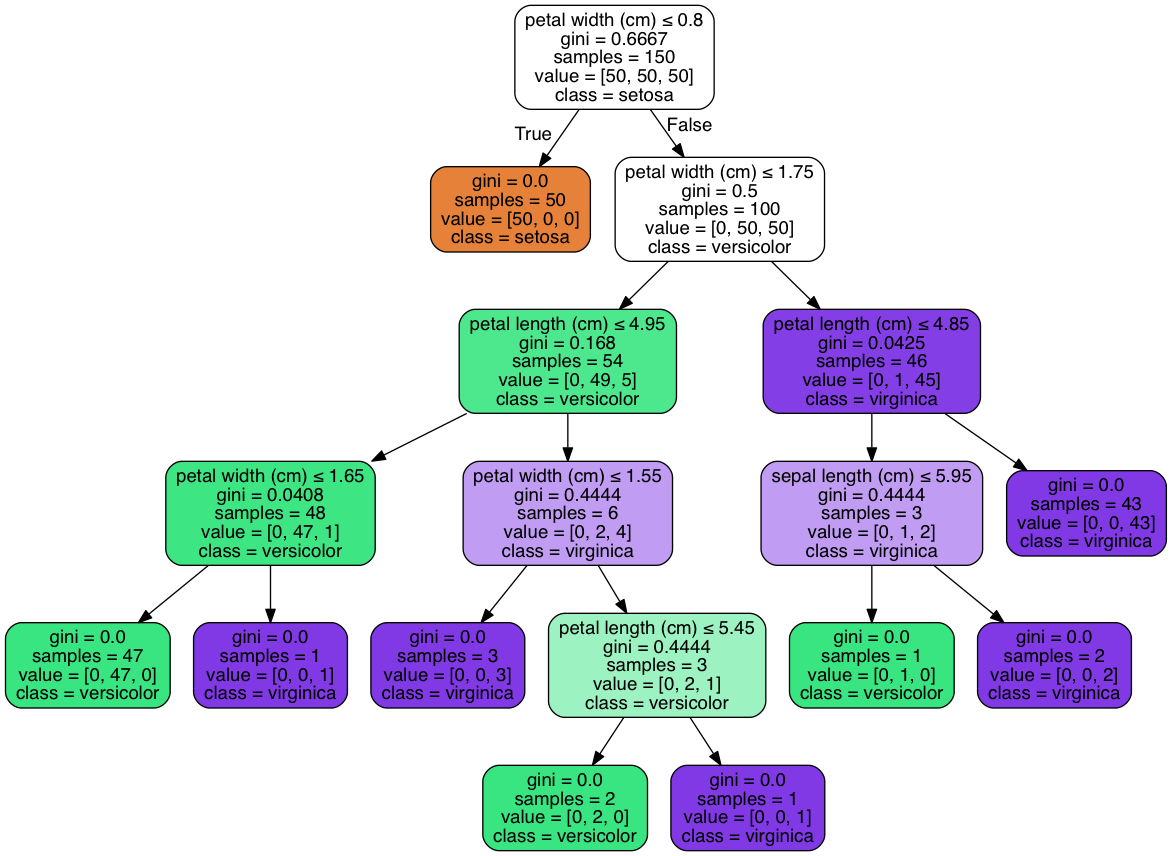

In [34]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
import graphviz
with open("iris.dot", 'w') as f:
 f = tree.export_graphviz(clf, out_file=f)
import os
os.unlink('iris.dot')
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  


In [22]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

clf = tree.DecisionTreeClassifier()
# clf = clf.fit(iris.data, iris.target)
clf = clf.fit(trainData, trainSentiment)
import graphviz
with open("train.dot", 'w') as f:
 f = tree.export_graphviz(clf, out_file=f)
import os
os.unlink('train.dot')


In [23]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("train.pdf") 


True

In [138]:
# from IPython.display import Image  
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names=iris.feature_names,  
#                          class_names=iris.target_names,  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())  

In [35]:
clf.predict(iris.data[:1, :])

array([0])

In [36]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

## Plot the decision surface of a decision tree

In [87]:
trainDataList = trainData.values.tolist()
trainSentimentList = trainSentiment.values.tolist()
trainDataArray = np.array(trainData)
trainSentimentArray = np.array(trainSentiment)

# templist = list(map(int,trainSentimentArray))

templist = trainSentimentArray

for i in range(len(templist)): 
    if templist[i] == 'positive':
        templist[i]=1
    if templist[i] == 'neutral':
        templist[i]=0
    else: 
        templist[i]=-1

trainSentimentArray = templist
# import matplotlib.pyplot as plt
# plt.subplot(trainSentimentArray)
import numpy
# numpy.set_printoptions(threshold=numpy.nan)
numpy.set_printoptions(threshold=50)
print(trainSentimentArray)
print(len(trainSentimentArray))
print(len(trainDataArray))
# list_of_strings = ['11','12','13']
# list_of_int = list(map(int,list_of_strings))
# list_of_int

[-1 -1 0 ..., -1 -1 0]
22987
22987


In [91]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
# iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
#     X = iris.data[:, pair]
#     y = iris.target

    X = trainDataArray[:, pair]
    Y = trainSentimentArray
    
    X
#     # Train
#     clf = DecisionTreeClassifier().fit(X, Y)

#     # Plot the decision boundary
#     plt.subplot(2, 3, pairidx + 1)

#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

#     plt.xlabel(train.feature_names[pair[0]])
#     plt.ylabel(train.feature_names[pair[1]])
#     plt.axis("tight")

#     # Plot the training points
#     for i, color in zip(range(n_classes), plot_colors):
#         idx = np.where(y == i)
#         plt.scatter(X[idx, 0], X[idx, 1], c=color, label=train.target_names[i],
#                     cmap=plt.cm.Paired)

#     plt.axis("tight")

#     plt.suptitle("Decision surface of a decision tree using paired features")
#     plt.legend()
#     plt.show()    

Automatically created module for IPython interactive environment


## KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y) 
# print(neigh.predict(Z))
# print(neigh.predict_proba(Z))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [158]:
d_pred=neigh.predict(Z)
t_pred = neigh.fit(X, Y).predict(Z)
text_file = open("testKNN.txt", "w")
for item in t_pred:
  text_file.write("%s\n" % item)
text_file.close()

tot=devData.shape[0]
pre=(devSentiment != d_pred).sum()
per=pre/tot
print("Number of mislabeled points out of a total %d points : %d percentage : %f" 
      % (devData.shape[0],(devSentiment != d_pred).sum(),per))

Number of mislabeled points out of a total 4926 points : 3008 percentage : 0.610637


In [159]:
from sklearn.metrics import classification_report
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
# target_names = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_true, y_pred, target_names=target_names))
y_true = devSentiment
y_pred = d_pred
target_names = ['positive', 'neutral', 'negative']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

   positive       0.25      0.53      0.34      1038
    neutral       0.49      0.34      0.41      2400
   negative       0.51      0.36      0.42      1488

avg / total       0.45      0.39      0.40      4926



## Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2)

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X,Y)
# print(clf.predict(Z))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [149]:
d_pred=clf.predict(Z)
t_pred = clf.fit(X, Y).predict(Z)
text_file = open("testRF.txt", "w")
for item in t_pred:
  text_file.write("%s\n" % item)
text_file.close()

tot=devData.shape[0]
pre=(devSentiment != d_pred).sum()
per=pre/tot
print("Number of mislabeled points out of a total %d points : %d percentage : %f" 
      % (devData.shape[0],(devSentiment != d_pred).sum(),per))

Number of mislabeled points out of a total 4926 points : 2060 percentage : 0.418189


In [145]:
from sklearn.metrics import classification_report
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
# target_names = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_true, y_pred, target_names=target_names))
y_true = devSentiment
y_pred = d_pred
target_names = ['positive', 'neutral', 'negative']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

   positive       0.52      0.22      0.31      1038
    neutral       0.56      0.85      0.67      2400
   negative       0.64      0.37      0.47      1488

avg / total       0.57      0.57      0.53      4926



## SVM

In [160]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X,Y)
# print(clf.predict(Z))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [161]:
d_pred=clf.predict(Z)
t_pred = clf.fit(X, Y).predict(Z)
text_file = open("testSVM.txt", "w")
for item in t_pred:
  text_file.write("%s\n" % item)
text_file.close()

tot=devData.shape[0]
pre=(devSentiment != d_pred).sum()
per=pre/tot
print("Number of mislabeled points out of a total %d points : %d percentage : %f" 
      % (devData.shape[0],(devSentiment != d_pred).sum(),per))

Number of mislabeled points out of a total 4926 points : 2067 percentage : 0.419610


In [162]:
from sklearn.metrics import classification_report
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
# target_names = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_true, y_pred, target_names=target_names))
y_true = devSentiment
y_pred = d_pred
target_names = ['positive', 'neutral', 'negative']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

   positive       0.60      0.20      0.30      1038
    neutral       0.55      0.90      0.69      2400
   negative       0.74      0.33      0.45      1488

avg / total       0.62      0.58      0.53      4926



In [51]:
import numpy as np
from sklearn import datasets
# iris = datasets.load_iris()
# iris_X = iris.data
# iris_y = iris.target
# np.unique(iris_y)

np.unique(Y)


array(['negative', 'neutral', 'positive'], dtype=object)

In [151]:
# """
# ================================
# SVM Exercise
# ================================

# A tutorial exercise for using different SVM kernels.

# This exercise is used in the :ref:`using_kernels_tut` part of the
# :ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.
# """
# print(__doc__)


# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import datasets, svm

# iris = datasets.load_iris()
# # X = iris.data
# # y = iris.target

# X = trainData
# y = trainSentiment

# X = X[y != 0, :2]
# y = y[y != 0]

# n_sample = len(X)

# np.random.seed(0)
# order = np.random.permutation(n_sample)
# X = X[order]
# y = y[order].astype(np.float)

# X_train = X[:.9 * n_sample]
# y_train = y[:.9 * n_sample]
# X_test = X[.9 * n_sample:]
# y_test = y[.9 * n_sample:]

# # fit the model
# for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
#     clf = svm.SVC(kernel=kernel, gamma=10)
#     clf.fit(X_train, y_train)

#     plt.figure(fig_num)
#     plt.clf()
#     plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

#     # Circle out the test data
#     plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

#     plt.axis('tight')
#     x_min = X[:, 0].min()
#     x_max = X[:, 0].max()
#     y_min = X[:, 1].min()
#     y_max = X[:, 1].max()

#     XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#     Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(XX.shape)
#     plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
#     plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
#                 levels=[-.5, 0, .5])

#     plt.title(kernel)
# plt.show()

In [152]:
# print(__doc__)


# # Code source: Gaël Varoquaux
# #              Andreas Müller
# # Modified for documentation by Jaques Grobler
# # License: BSD 3 clause

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# h = .02  # step size in the mesh

# names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
#          "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
#          "Naive Bayes", "QDA"]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis()]

# # X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
# #                            random_state=1, n_clusters_per_class=1)
# # rng = np.random.RandomState(2)
# # X += 2 * rng.uniform(size=X.shape)
# # linearly_separable = (X, y)

# # datasets = [make_moons(noise=0.3, random_state=0),
# #             make_circles(noise=0.2, factor=0.5, random_state=1),
# #             linearly_separable
# #             ]

# X = trainData
# y = trainSentiment

# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# # for ds_cnt, ds in enumerate(datasets):
# for ds_cnt, ds in enumerate(trainData):    
#     # preprocess dataset, split into training and test part
#     X, y = ds
#     X = StandardScaler().fit_transform(X)
#     X_train, X_test, y_train, y_test = \
#         train_test_split(X, y, test_size=.4, random_state=42)

#     x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#     y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
#     # and testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

#     # iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#         clf.fit(X_train, y_train)
#         score = clf.score(X_test, y_test)

#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

#         # Plot also the training points
#         ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
#         # and testing points
#         ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#                    alpha=0.6)

#         ax.set_xlim(xx.min(), xx.max())
#         ax.set_ylim(yy.min(), yy.max())
#         ax.set_xticks(())
#         ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name)
#         ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
#                 size=15, horizontalalignment='right')
#         i += 1

# plt.tight_layout()
# plt.show()

In [153]:
# import plotly
# plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

# import plotly.plotly as py
# import plotly.graph_objs as go
# import pandas as pd


# # Read data from a csv
# # z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
# # z_data = trainData
# z_data = devData

# data = [
#     go.Surface(
#         z=z_data.as_matrix()
#     )
# ]
# layout = go.Layout(
#     title='Mt Bruno Elevation',
#     autosize=False,
#     width=500,
#     height=500,
#     margin=dict(
#         l=65,
#         r=50,
#         b=65,
#         t=90
#     )
# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='elevations-3d-surface')

In [154]:
# '''
# ===========================
# More triangular 3D surfaces
# ===========================

# Two additional examples of plotting surfaces with triangular mesh.

# The first demonstrates use of plot_trisurf's triangles argument, and the
# second sets a Triangulation object's mask and passes the object directly
# to plot_trisurf.
# '''

# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.tri as mtri


# fig = plt.figure(figsize=plt.figaspect(0.5))

# #============
# # First plot
# #============

# # Make a mesh in the space of parameterisation variables u and v
# u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
# v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
# u, v = np.meshgrid(u, v)
# u, v = u.flatten(), v.flatten()

# # This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# # triple
# x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
# y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
# z = 0.5 * v * np.sin(u / 2.0)

# # Triangulate parameter space to determine the triangles
# tri = mtri.Triangulation(u, v)

# # Plot the surface.  The triangles in parameter space determine which x, y, z
# # points are connected by an edge.
# ax = fig.add_subplot(1, 2, 1, projection='3d')
# ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
# ax.set_zlim(-1, 1)


# #============
# # Second plot
# #============

# # Make parameter spaces radii and angles.
# n_angles = 36
# n_radii = 8
# min_radius = 0.25
# radii = np.linspace(min_radius, 0.95, n_radii)

# angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
# angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
# angles[:, 1::2] += np.pi/n_angles

# # Map radius, angle pairs to x, y, z points.
# x = (radii*np.cos(angles)).flatten()
# y = (radii*np.sin(angles)).flatten()
# z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# # Create the Triangulation; no triangles so Delaunay triangulation created.
# triang = mtri.Triangulation(x, y)

# # Mask off unwanted triangles.
# xmid = x[triang.triangles].mean(axis=1)
# ymid = y[triang.triangles].mean(axis=1)
# mask = np.where(xmid**2 + ymid**2 < min_radius**2, 1, 0)
# triang.set_mask(mask)

# # Plot the surface.
# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


# plt.show()
